In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
print(os.listdir("dataset"))

import warnings
warnings.filterwarnings('ignore')

['.gitkeep', 'data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


# Explore Dataset
> **Sample Train Dataset**

In [91]:
## Import Trainning data. 
train = pd.read_csv("dataset/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


> **Sample Test Dataset**

In [92]:
## Import test data.
test = pd.read_csv("dataset/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Describe the Datasets

In [93]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


If you want to know more about why we are splitting dataset's into train and test, please check out this [kernel](https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic).

In [94]:
# gives us statistical info about the numerical variables. 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [95]:
## Gives us information about the features. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Check how many: Missing Values, Vategorical Values, etc. each feature has

In [96]:
# drop_threshold = 50 
# print("There are {}({:.1f}%) categorical features".format())

In [97]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Checking for Missing Values

### Missing Train values

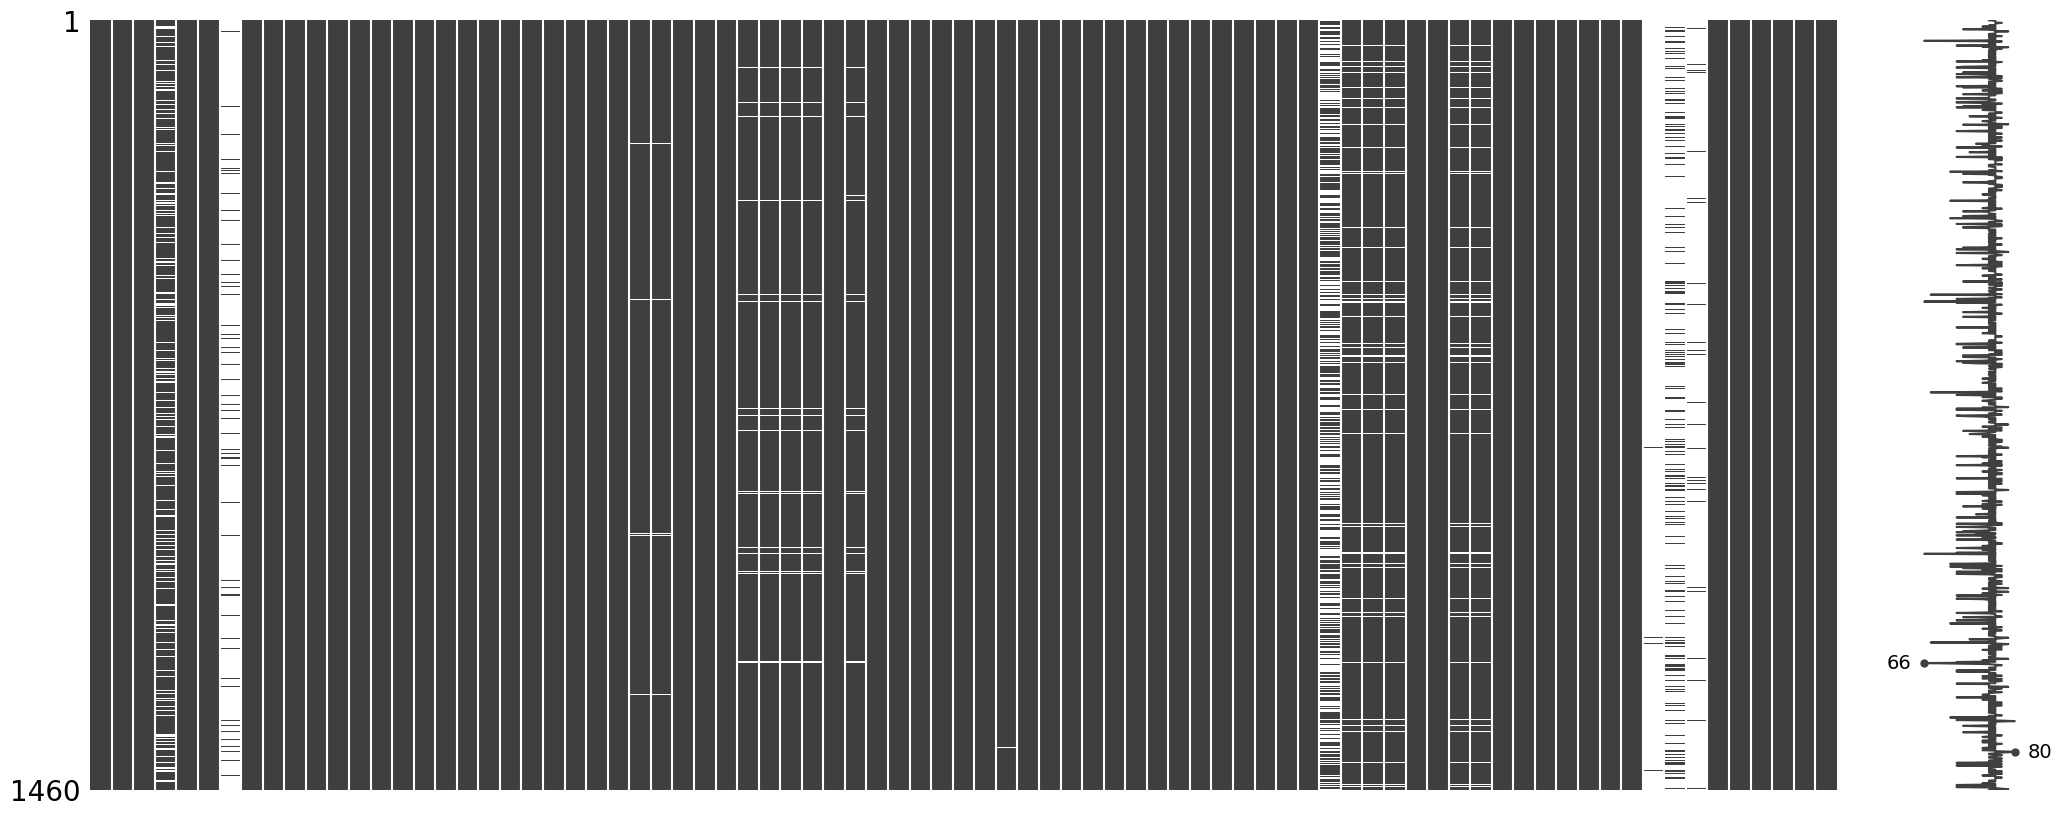

In [98]:
import missingno as msno

msno.matrix(train);

In [99]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    # Get Missing Velues per feature (exclude features that are complete)
    feature_missing = train.isnull().sum().sort_values(ascending = False)
    feature_missing = feature_missing[feature_missing > 0]
    percent = round(feature_missing/len(df)*100, 2)
    return pd.concat([feature_missing, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


### Missing Test values

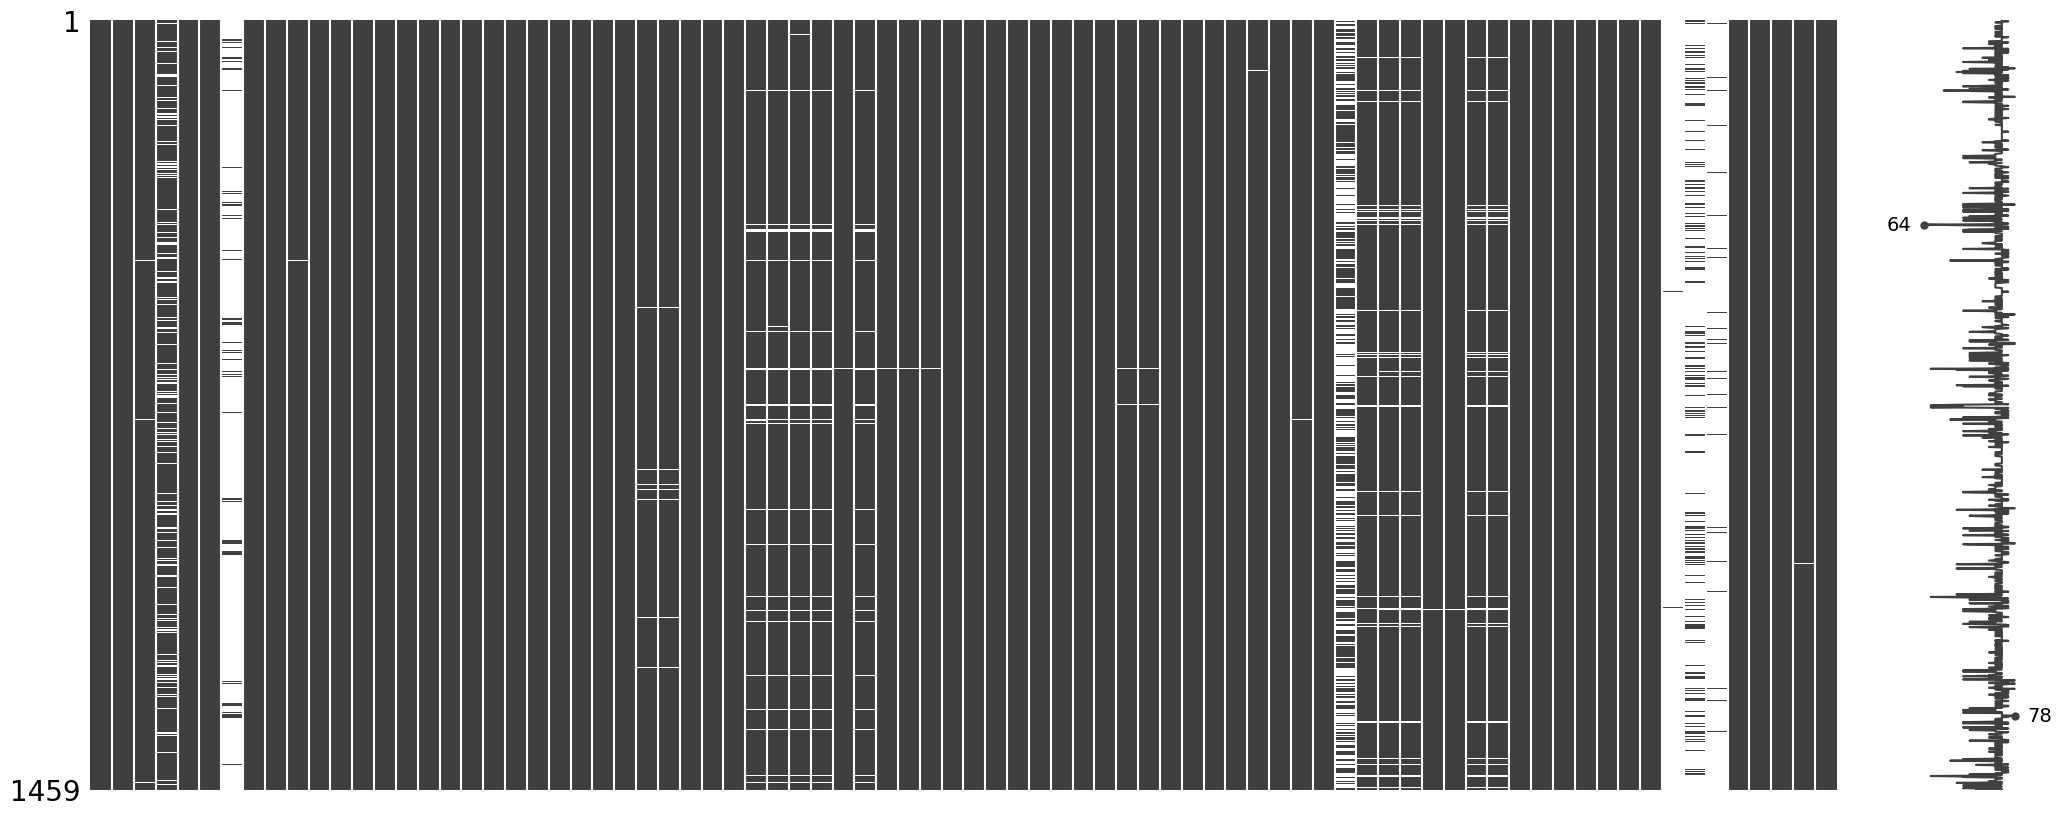

In [100]:
msno.matrix(test);

In [101]:
missing_percentage(test)

,Total,Percent
PoolQC,1453,99.59
MiscFeature,1406,96.37
Alley,1369,93.83
Fence,1179,80.81
FireplaceQu,690,47.29
LotFrontage,259,17.75
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


Makes sence to drop features that have more than 20% of missing values and fill with mean/median the rest of features. Will do it in pre-processign stage

<Axes: >

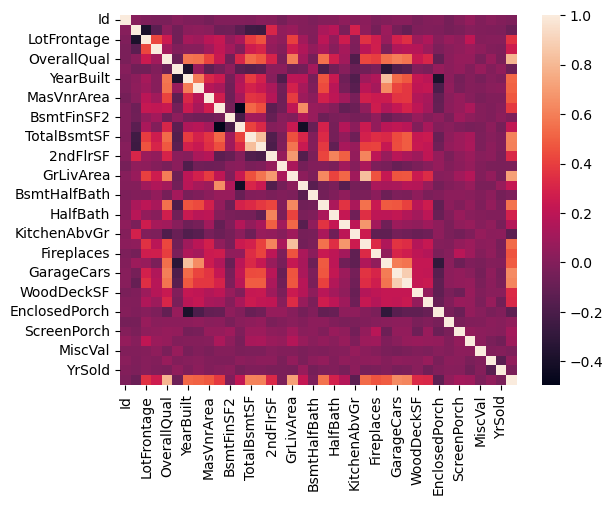

In [102]:
cor = train.corr()
sns.heatmap(cor)

<Axes: title={'center': 'Feature Correlation to Sale Price'}>

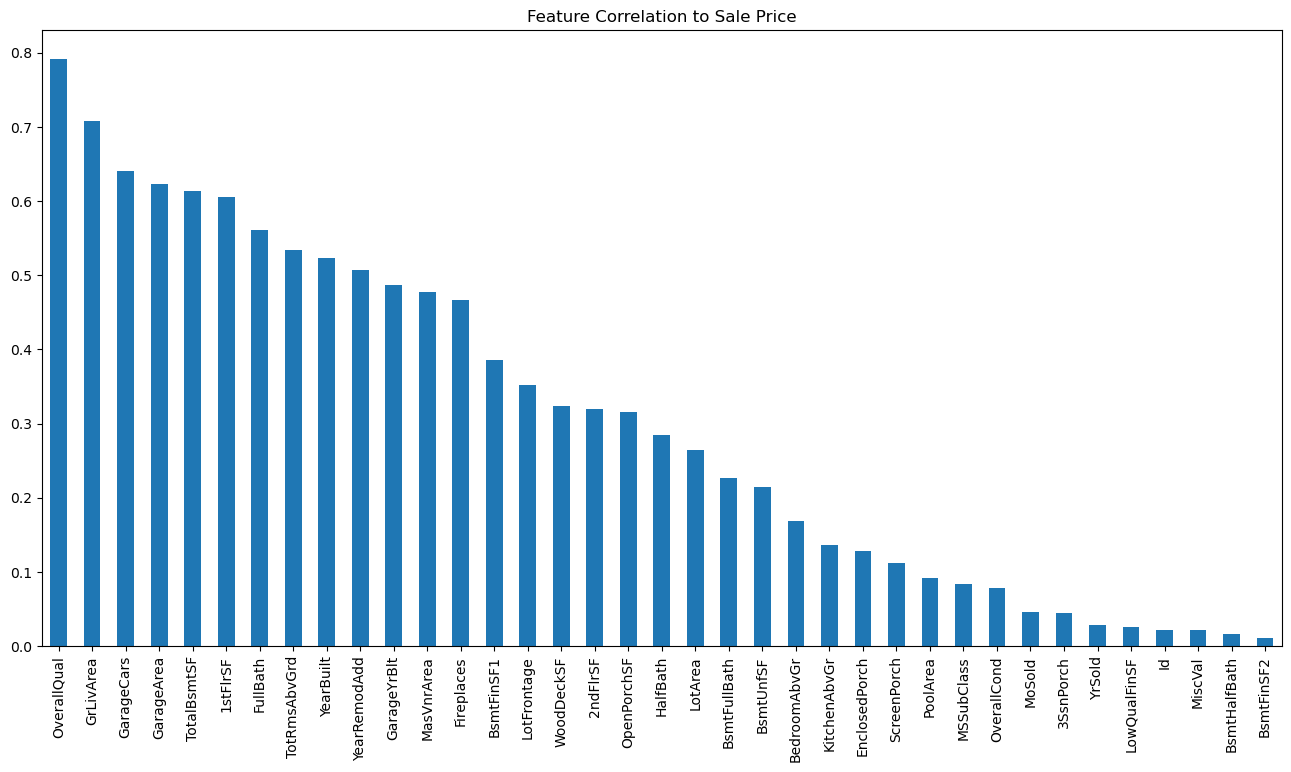

In [103]:
abs(cor["SalePrice"]).drop("SalePrice").sort_values(ascending = False).plot(kind="bar", figsize=(16, 8), title="Feature Correlation to Sale Price")

These are the predictor variables sorted in a descending order starting with the most correlated one **OverallQual**. Let's put this one in a scatter plot and see how it looks.

# 2. Filtering and Fine-Tuning Dataset

> Removing features with low data filling percentage

In [104]:
drop_threshold = 20 # Drop features that have more than 20% of missing data

low_data_features = missing_percentage(train)
low_data_features = low_data_features[low_data_features["Percent"] >  drop_threshold]
drop_cols = low_data_features.T.columns
print("Features to be dropped: \n{} \n{}".format(low_data_features, drop_cols))

train.drop(drop_cols, axis=1, inplace = True)

Features to be dropped: 
             Total  Percent
PoolQC        1453    99.52
MiscFeature   1406    96.30
Alley         1369    93.77
Fence         1179    80.75
FireplaceQu    690    47.26 
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')


Checking..

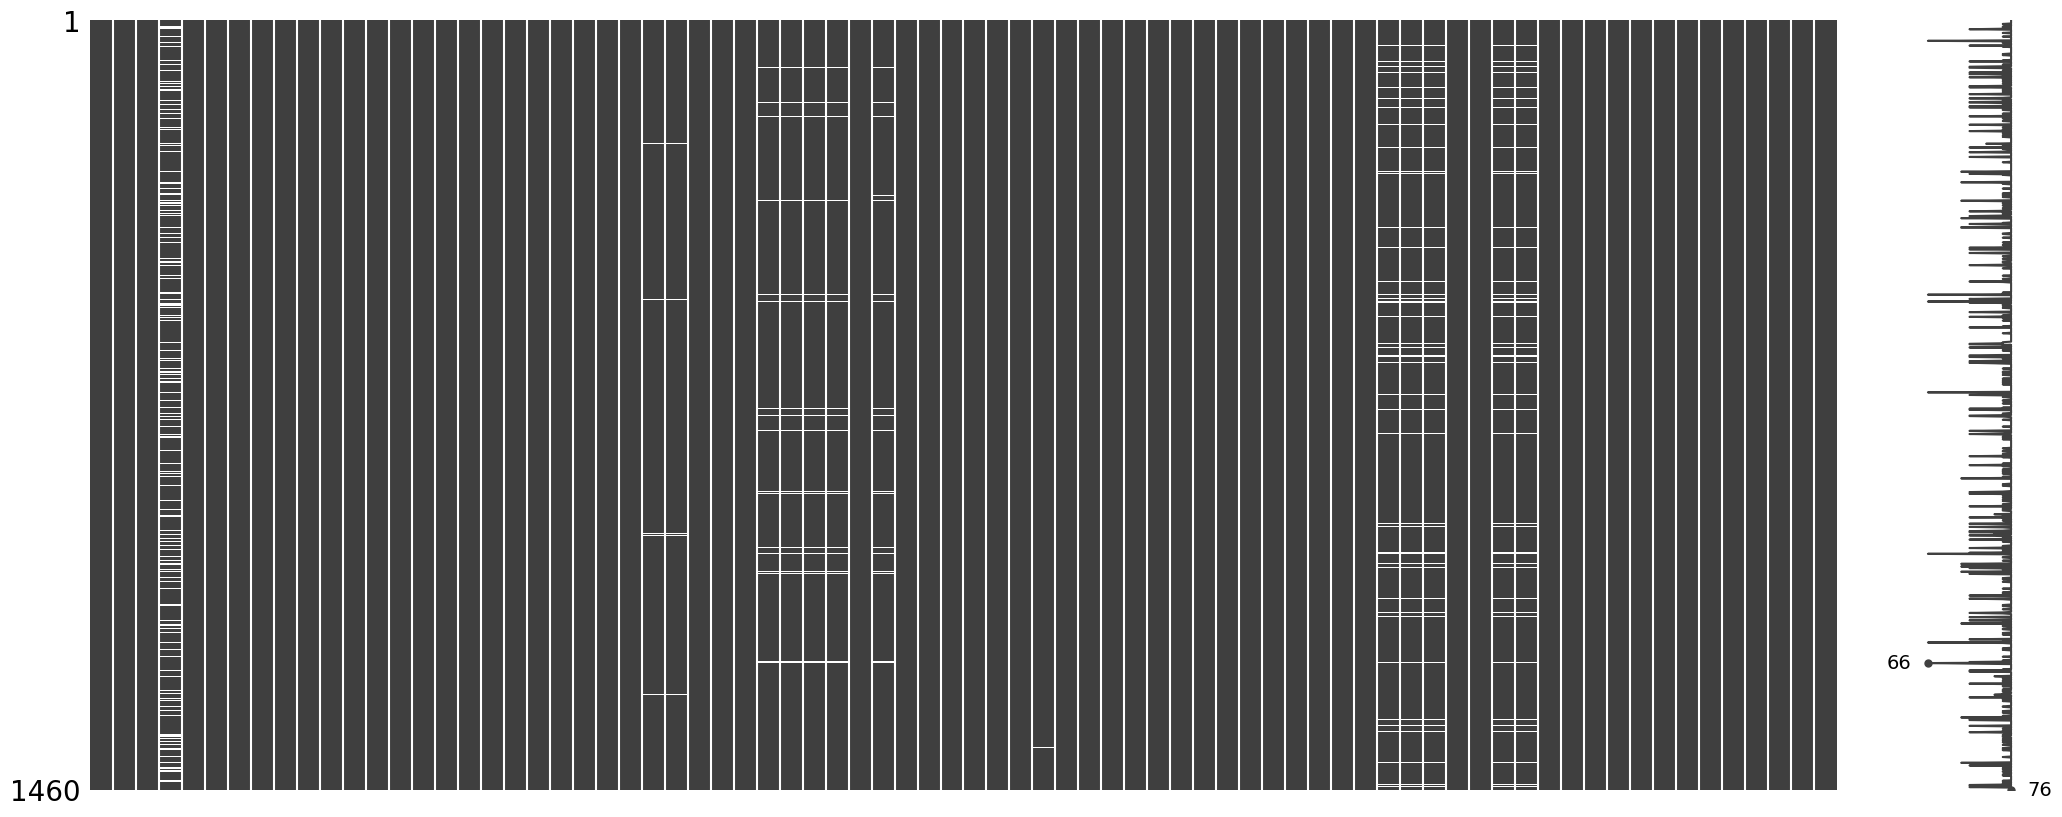

In [105]:
msno.matrix(train);

> Filling missing data

I have a lot of categorical data and therefore to not add new categories I fill with mode and not mean

In [106]:
train.mode(axis=0).dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20.0,RL,60.0,7200.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,WD,Normal,140000.0


In [107]:
train.isna().sum().sum()

868

In [108]:
train.fillna(train.mode().iloc[0], inplace = True)  # There is a trick to convert .mode() to DataFrame
train.isna().sum().sum()

0

Checking..

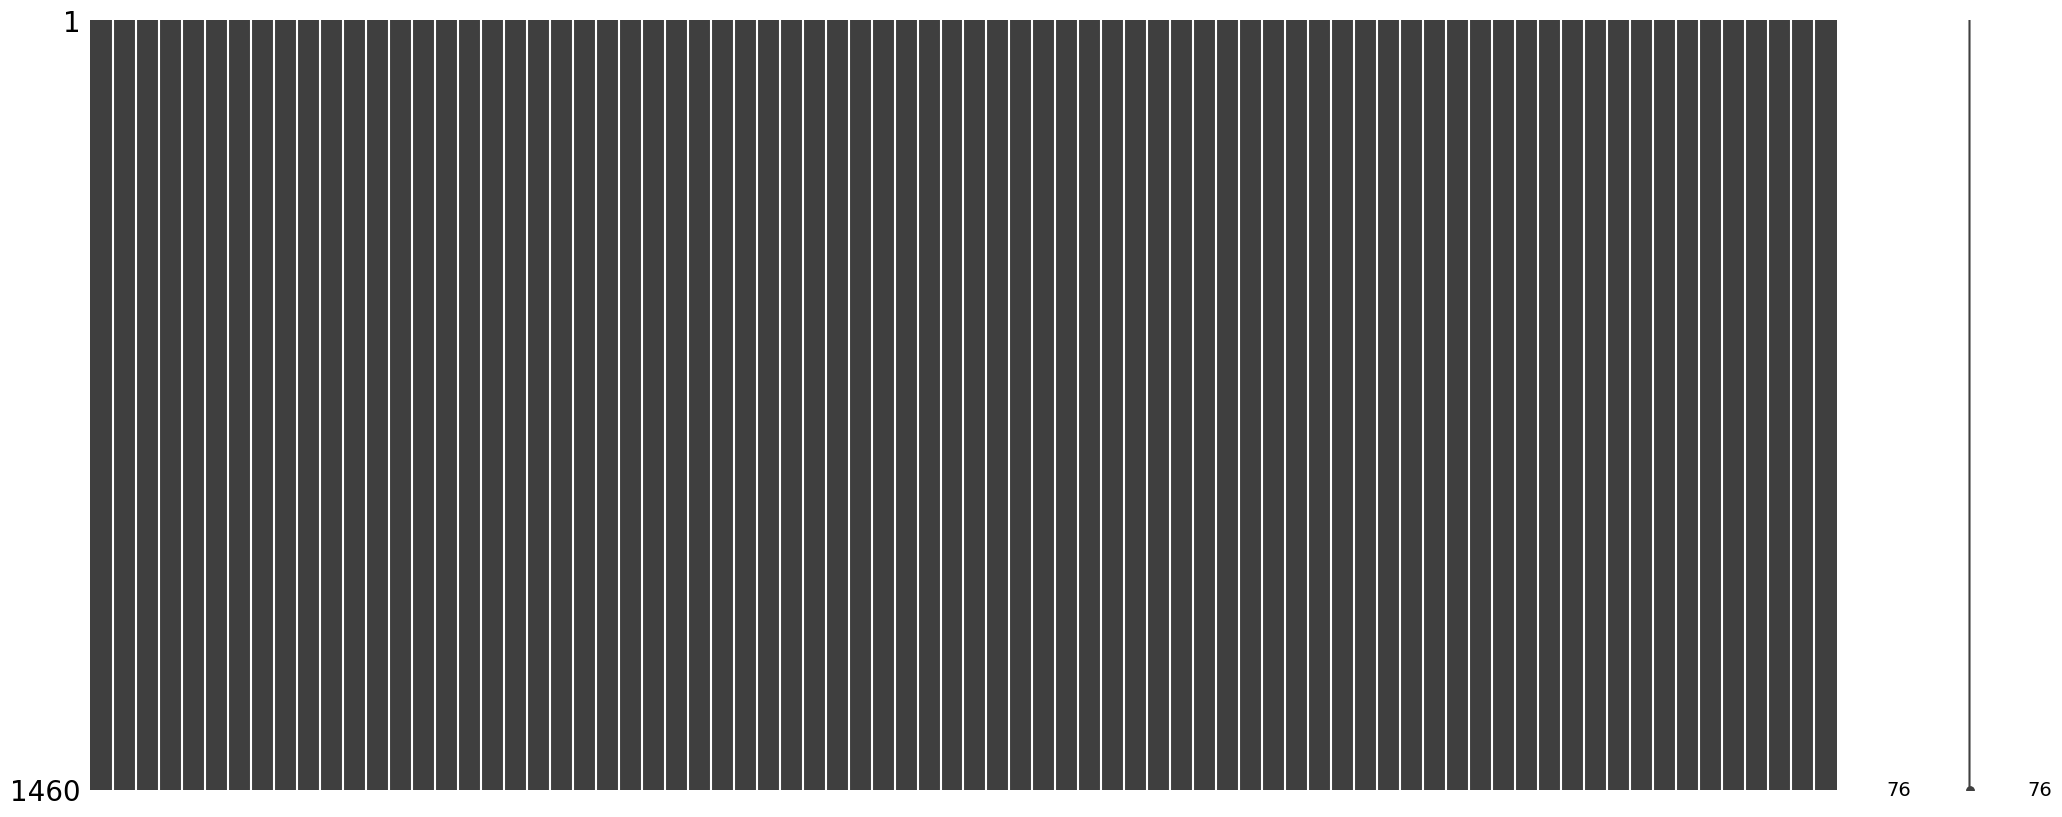

In [109]:
msno.matrix(train);

> Removing outliners

This is a complicated process as it involves a problem of outlier detection and then it can create new problems of missing values

I will apply IQR outlier detection that provides me with formula for minimum and maximum values

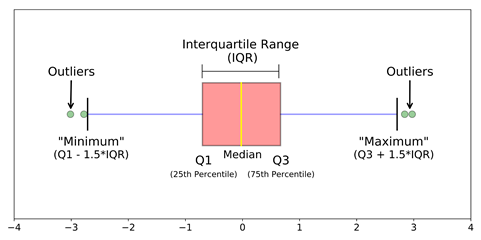

First, I will calculate how many outliers there are for each feature. If some feature has a lot of outliers it make sense to completely drop this feature as it will not brind valuable information from analysis.

Checking outliners

<Axes: >

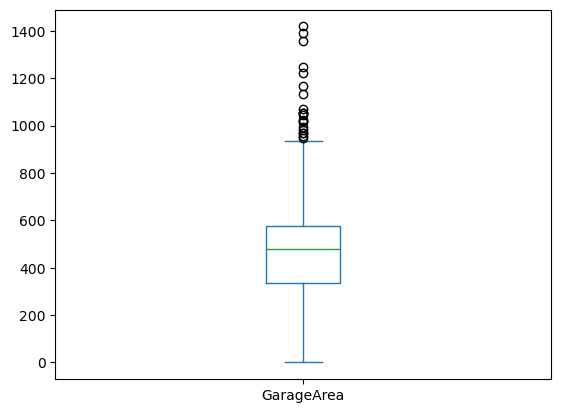

In [110]:
train["GarageArea"].plot(kind="box")

<Axes: >

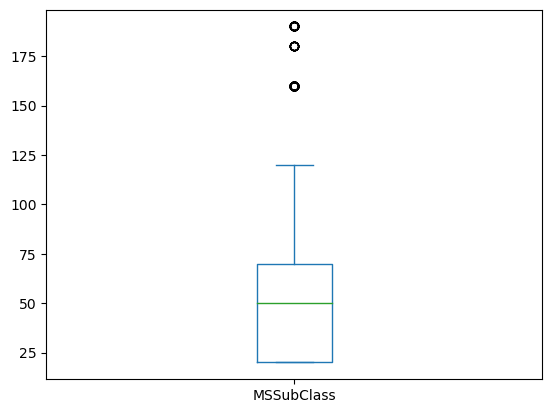

In [111]:
train["MSSubClass"].plot(kind="box")

<Axes: title={'center': 'Percentage of Outliers'}>

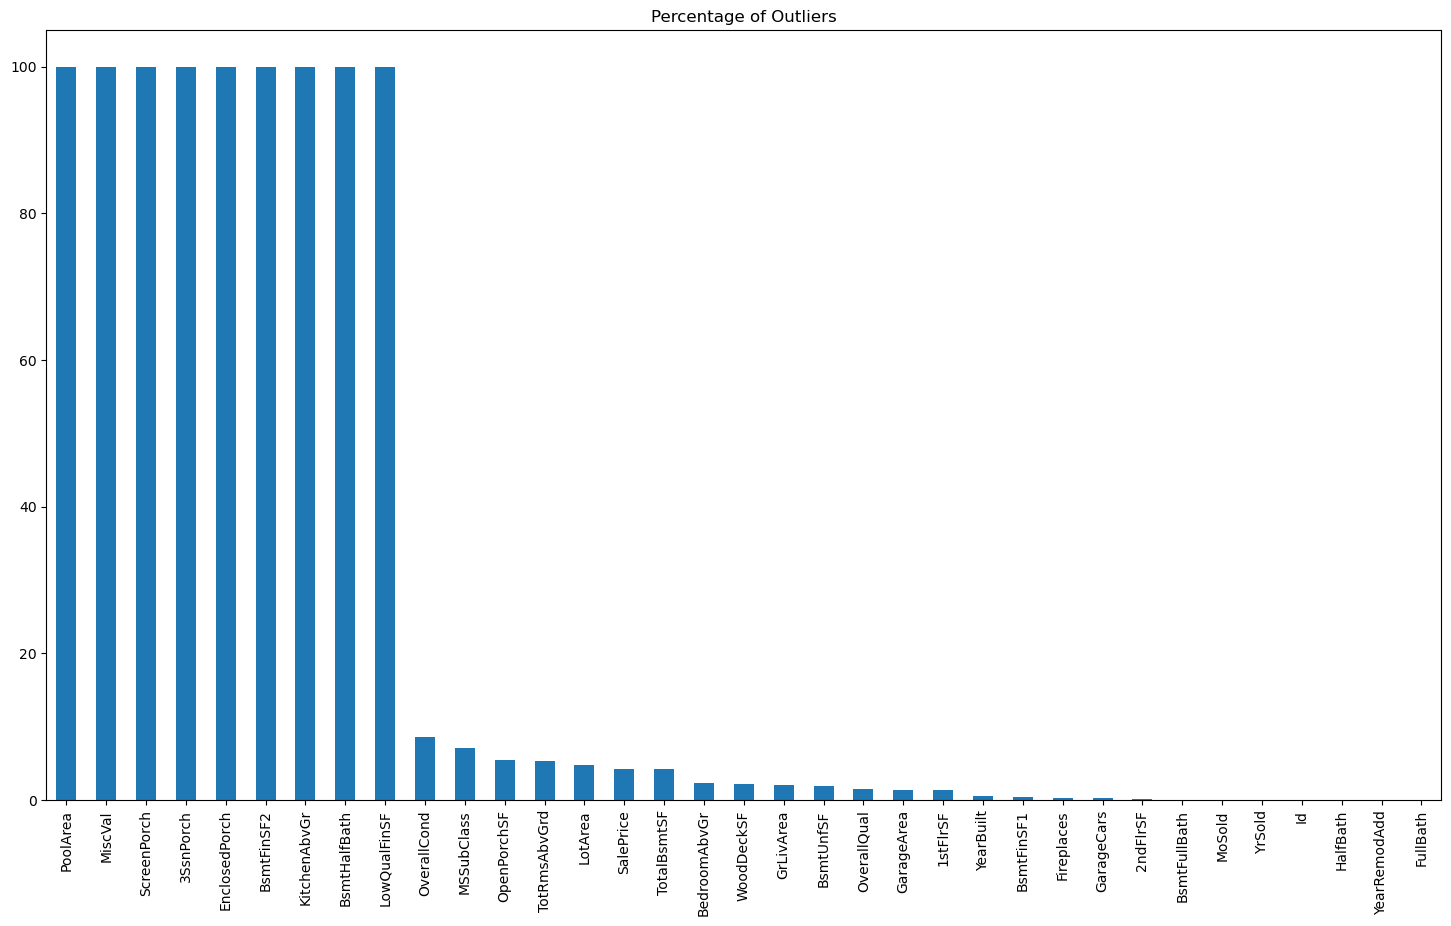

In [112]:
def count_outliers(df):
    """ Returns table feature-wise outlier count """
    out = pd.Series(index=df.columns)
    total_num = df.shape[0]
    for column in df:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lowest_val = Q1 - 1.5*IQR
        highest_val = Q3 + 1.5*IQR
        
        flter_df = df[column].copy()
        flter_df = flter_df[flter_df > lowest_val]
        flter_df = flter_df[flter_df < highest_val]

        outlier_percentage = round(100 * (total_num - flter_df.shape[0]) / total_num, 2) 
        out[column] = outlier_percentage

    return out.sort_values(ascending = False)

numerical_train = train.loc[:, train.dtypes == np.int64]
count_outliers(numerical_train).plot(kind="bar", figsize=(18, 10), title="Percentage of Outliers")

From this Bar plot it is seen that most of features have just a bit of outliers, but first 9 features have something wrong...

Let's investigate what is happening there

Yeah, they actually have A LOT OF zero-outliers. It would be easier just to drop such features

In [113]:
drop_outliers_threshold = 50 # Drop all features that have more than 50% of outliers

outliers = count_outliers(numerical_train)
zero_outliers = outliers.index[outliers > drop_outliers_threshold]
print(zero_outliers)

train.drop(zero_outliers, axis=1, inplace=True)

Index(['PoolArea', 'MiscVal', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch',
       'BsmtFinSF2', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF'],
      dtype='object')


Checking..

(1460, 67)

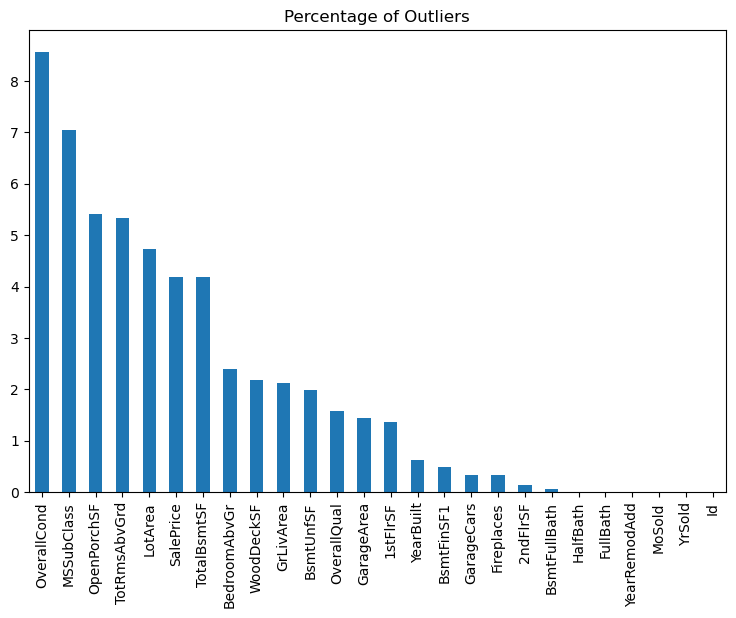

In [114]:
numerical_train = train.loc[:, train.dtypes == np.int64]
count_outliers(numerical_train).plot(kind="bar", figsize=(9, 6), title="Percentage of Outliers")
train.shape

Now I can apply IQR outlier detector and remove outliers

In [115]:
def drop_outliers(ddf, field_name):
    """ Drops outliers for specific column """
    df = ddf.copy()
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
    return df

def drop_outliers_IQR(df):
    """ Drops samples that include outliers """
    for column in df:
        if df[column].dtypes != np.int64:
            continue
        df = drop_outliers(df, column)
    return df

In [116]:
train = drop_outliers_IQR(train)
print(train.shape)

(945, 67)


Checking..

<Axes: title={'center': 'Percentage of Outliers'}>

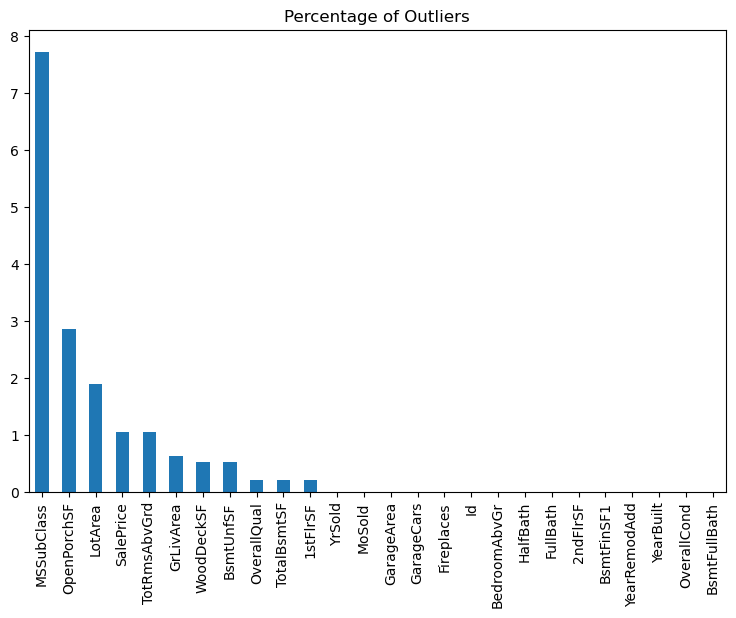

In [117]:
numerical_train = train.loc[:, train.dtypes == np.int64]
count_outliers(numerical_train).plot(kind="bar", figsize=(9, 6), title="Percentage of Outliers")

Hmmm, not all outliers dissapeared...

> ! **I tried removing outliers for features above, but eventually got stuck in creating new outliers after deleting old ones, as statistical Lowest and Highest values update after filtering. Therefore at this point outlier filtration shall stop. For visualisation I will show how outliers are not dissapearing**

(863, 67)


<Axes: title={'center': 'Percentage of Outliers'}>

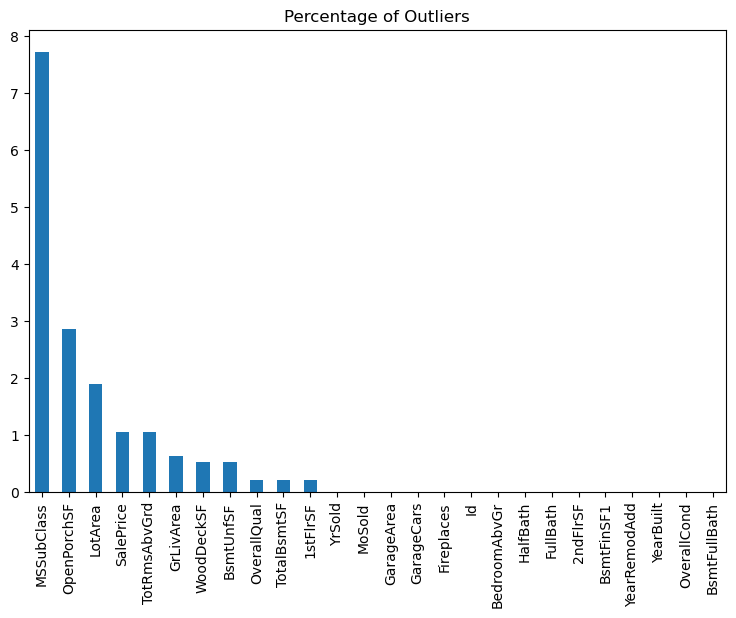

In [118]:
train_example = drop_outliers_IQR(train)
print(train_example.shape)
numerical_train = train.loc[:, train_example.dtypes == np.int64]
count_outliers(numerical_train).plot(kind="bar", figsize=(9, 6), title="Percentage of Outliers")

> Clearly I filtered some samples, the number dropped from 945 to 863! But the Figure of Outliers is the same! It shows that I have to accept some level of outliers. Otherwise I will lose a lot of data

<Axes: >

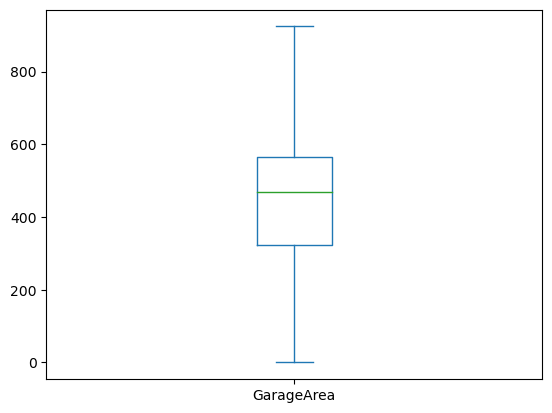

In [119]:
train["GarageArea"].plot(kind="box")

Here is a boxplot of GarageArea feature. Go up and find it before Outlier filtering. You will find that I made it clean as well as many other features!

I just want to build correlation before I apply One-Hot encoding and feature extraction with PCA

<Axes: >

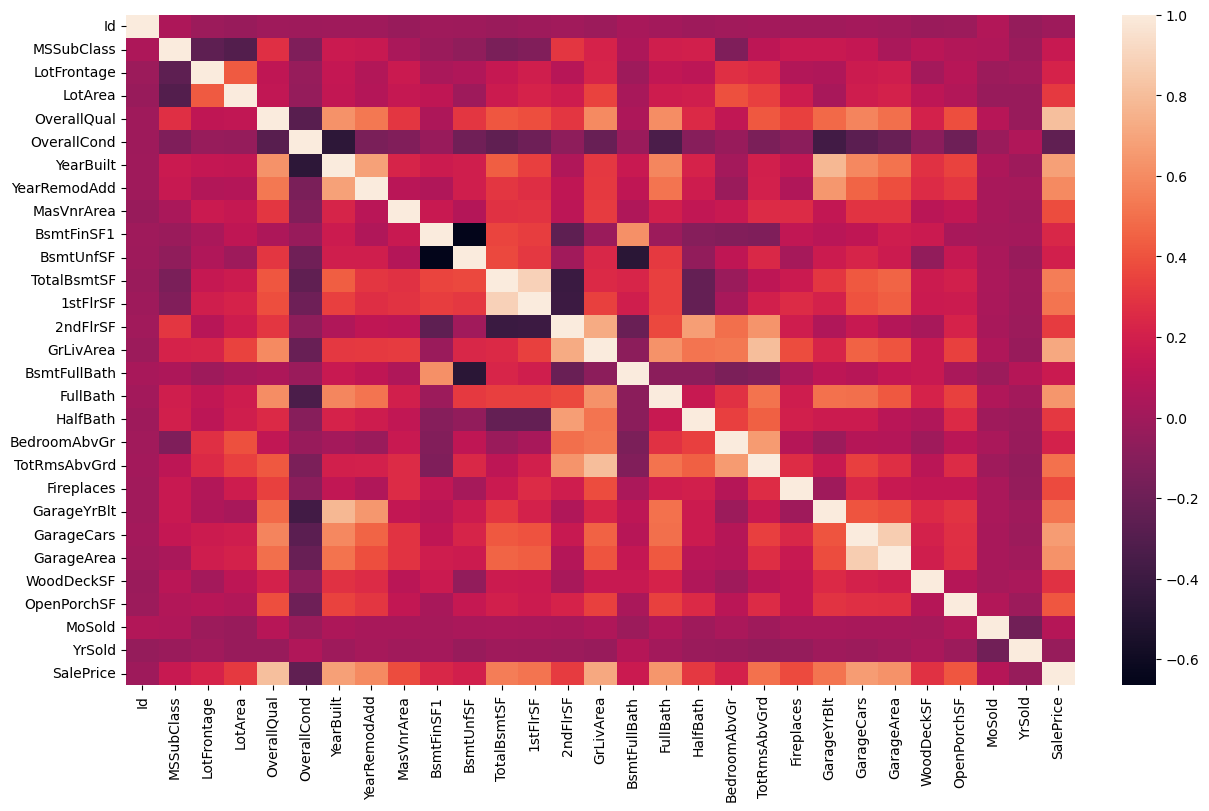

In [120]:
cor = train.corr()
plt.figure(constrained_layout=True, figsize=(12,8))
sns.heatmap(cor)

> At this point I filtered lots of features and I should remember which I dropped to do the same with testing data. 

    Next code-block makes a list of features to be dropped fro test data

In [121]:
drop_columns = set(pd.read_csv("dataset/train.csv").columns) - set(train.columns)
drop_columns.update(["Id"]) # Id is obviously unnecessary feature
print("Columns to be dropped during pre-processing: {}".format(drop_columns))

Columns to be dropped during pre-processing: {'Alley', 'FireplaceQu', 'MiscFeature', 'LowQualFinSF', 'Fence', '3SsnPorch', 'PoolArea', 'BsmtFinSF2', 'PoolQC', 'BsmtHalfBath', 'ScreenPorch', 'EnclosedPorch', 'Id', 'MiscVal', 'KitchenAbvGr'}


In [122]:
def filter_and_fill_features(df, drop_cols):
    """ Drops features with a lot of outliers or Missing Values. Fills entries with modes """
    df.drop(drop_cols, axis=1, inplace = True)
    df.fillna(df.mode().iloc[0], inplace = True) 
    df = drop_outliers_IQR(df)
    return df

In [123]:
train = pd.read_csv("dataset/train.csv")
train = filter_and_fill_features(train, drop_columns)

In [124]:
print("{} {}".format(train.shape, train.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     945 non-null    int64  
 1   MSZoning       945 non-null    object 
 2   LotFrontage    945 non-null    float64
 3   LotArea        945 non-null    int64  
 4   Street         945 non-null    object 
 5   LotShape       945 non-null    object 
 6   LandContour    945 non-null    object 
 7   Utilities      945 non-null    object 
 8   LotConfig      945 non-null    object 
 9   LandSlope      945 non-null    object 
 10  Neighborhood   945 non-null    object 
 11  Condition1     945 non-null    object 
 12  Condition2     945 non-null    object 
 13  BldgType       945 non-null    object 
 14  HouseStyle     945 non-null    object 
 15  OverallQual    945 non-null    int64  
 16  OverallCond    945 non-null    int64  
 17  YearBuilt      945 non-null    int64  
 18  YearRemod

## One-Hot-Encoding

Encode categorical variables

There are two steps for Encoding:
- Defining which features are categorical
- Drop them and replace with One-Hot-Encoded alternatives

In [125]:
categorical_columns = train.columns[train.dtypes == "object"]
print(categorical_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [126]:
def apply_categorical_encoding(dff, categorical_columns):
    """ For given list of categorical features it replaces categorical columns with encoded ste of columns """
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder()

    df = dff.copy().reset_index()
    encoded_dataframe = pd.DataFrame()
    for column in categorical_columns:
        encoded_data = encoder.fit_transform(df[[column]]).toarray()
        encoded_df = pd.DataFrame(encoded_data, columns=['{}_'.format(column) + x for x in encoder.categories_[0]])
        encoded_dataframe = pd.concat([encoded_dataframe, encoded_df], axis=1)
        
    df.drop(categorical_columns, axis=1, inplace=True)
    df = pd.concat([df, encoded_dataframe], axis=1)
    return df

In [127]:
print("Before encoding: {}".format(train.shape))
enc_train = apply_categorical_encoding(train, categorical_columns)
print("After encoding: {}".format(enc_train.shape))

Before encoding: (945, 66)
After encoding: (945, 240)


## Feature Extraction

Now it is time to reduce number of features to make training easier

Currently, dataset has next 945 samples and 240 columns. Number of feature MUST be reduced

In [128]:
print(enc_train.shape)

(945, 240)


<Axes: >

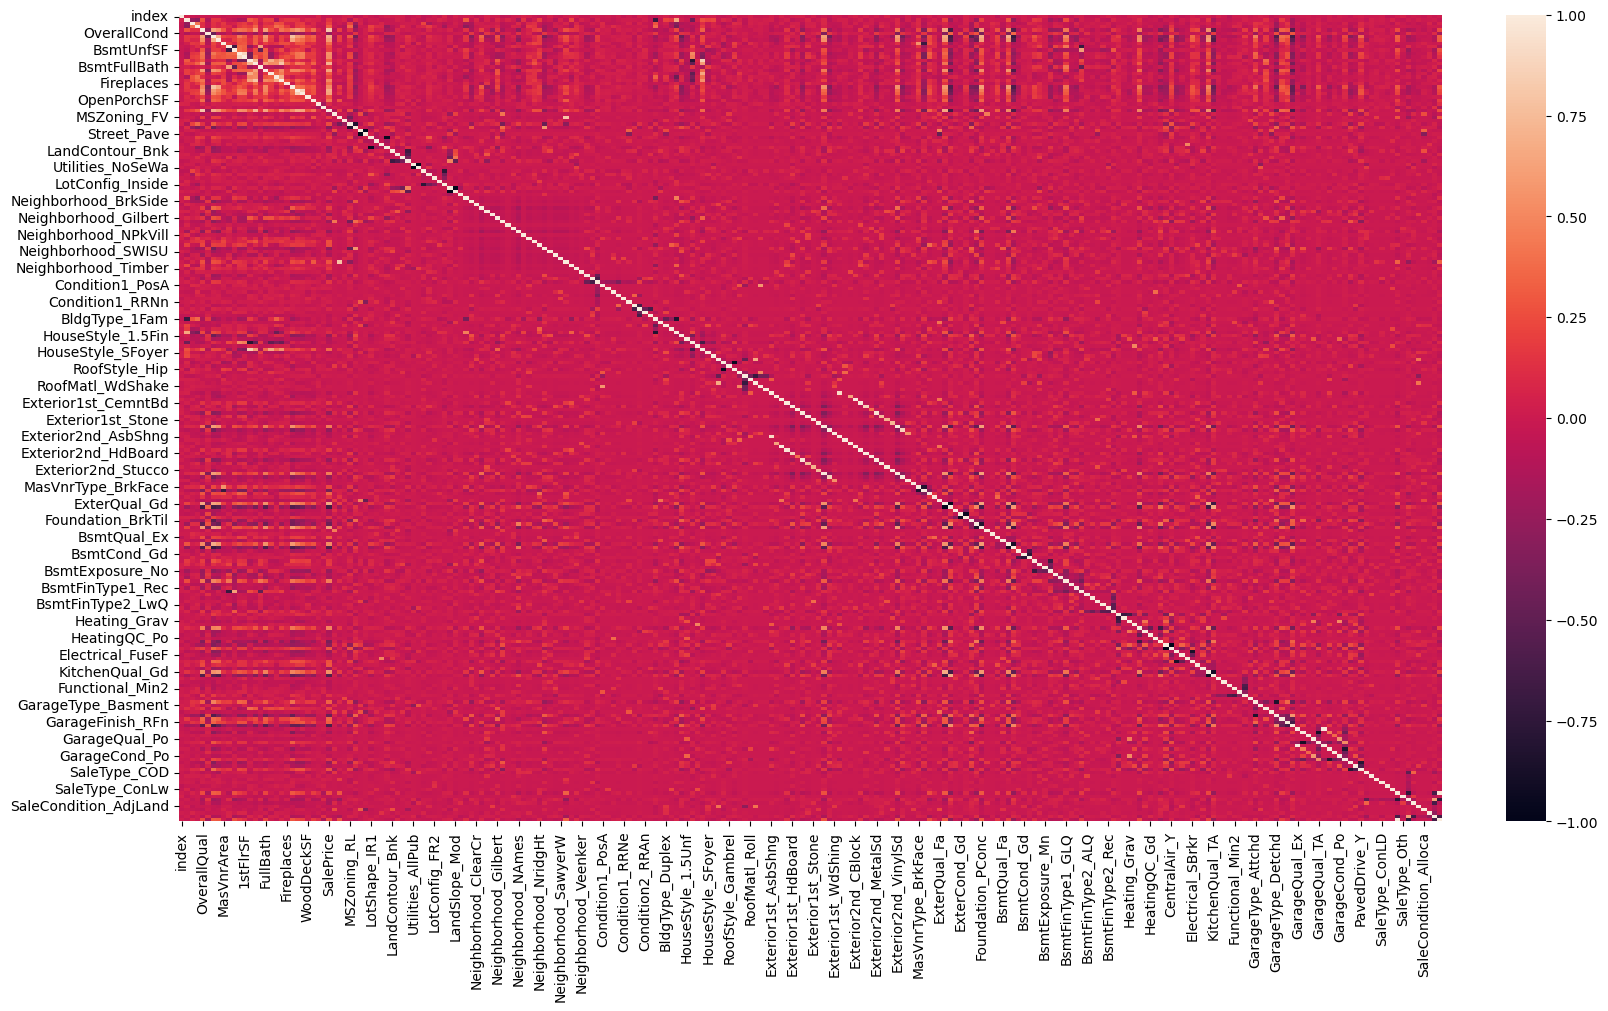

In [129]:
cor = enc_train.corr()
plt.figure(constrained_layout=True, figsize=(16,10))
sns.heatmap(cor)

In [130]:
print(list(enc_train.columns))

['index', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Ne

In [131]:
y = enc_train["SalePrice"]
enc_train.drop(["SalePrice"], axis=1, inplace=True)

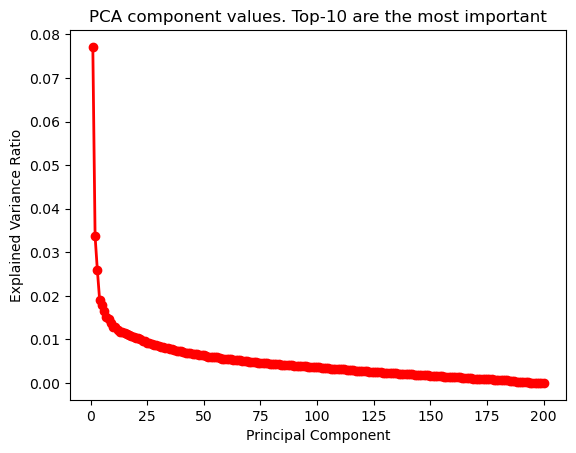

In [145]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(enc_train)

enc_train = pd.DataFrame(scaler.transform(enc_train))

pca = PCA(n_components=200)
pca.fit_transform(enc_train)

# plot scree plot
plt.plot(range(1, 201), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('PCA component values. Top-10 are the most important')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

<Axes: >

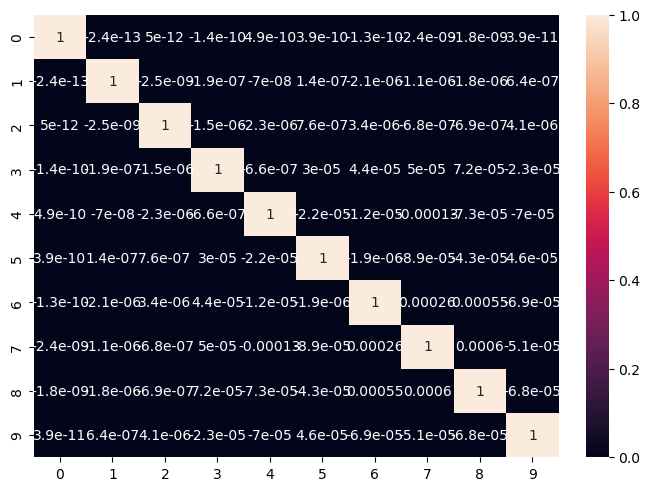

In [146]:
pca = PCA(n_components=10)

pca.fit(enc_train)
pca_train = pd.DataFrame(pca.transform(enc_train))

cor = pca_train.corr()
plt.figure(constrained_layout=True)
sns.heatmap(cor, annot=True)

## Scaling

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(pca_train)

scaled_train = pd.DataFrame(scaler.transform(pca_train))
scaled_train

,0,1,2,3,4,5,6
0,-0.316993,0.178948,-1.195414,1.480812,-1.767383,-0.778634,-0.554956
1,0.702441,0.614419,-0.839798,0.867876,-1.714018,-0.936191,-0.502316
2,0.079005,0.917633,-0.736934,0.459773,-1.722864,-0.827616,0.989817
3,1.812864,0.794519,-0.433990,1.723696,-1.644671,-1.768732,-0.289880
4,1.732618,-0.630986,-1.431991,-0.120048,-1.719935,-0.621256,-0.782250
...,...,...,...,...,...,...,...
940,-0.027481,1.059276,2.380060,-0.375621,1.842908,-1.511910,0.209888
941,2.846275,0.169113,0.501702,-2.677379,1.808898,2.368093,-1.726606
942,-0.680049,-0.164243,0.729035,-0.300586,1.737777,0.414530,-0.629784
943,-0.520601,1.411208,-0.167736,0.053216,1.719166,0.021371,-0.513096


> At this point preprocessing is finished and I can create functions to repeat all steps

In [136]:
def reduce_features(dff):
    """ Reduces dimentionality with PCA, applies data normalization """
    df = dff.copy()
    pca_df = pd.DataFrame(pca.transform(df))
    scaled_df = pd.DataFrame(scaler.transform(pca_train))
    return 

# Why not to make One Function for All Preprocessing?

Step #1. train:  (1460, 81)
Step #1. test:  (1459, 80)
Step #2.0. train:  (1460, 80)
Step #2.0. test:  (1459, 79)
Features to be dropped: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
Step #2.1. train:  (1460, 75)
Step #2.1. test:  (1459, 74)
Outlier features: ['BsmtHalfBath', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'BsmtFinSF2', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF']
Step #2.2. train:  (1460, 66)
Step #2.2. test:  (1459, 65)
Step #3. train:  (1460, 66)
Step #3. test:  (1459, 65)
Step #4. train:  (945, 66)
Step #4. test:  (1459, 65)
Step #5. train:  (945, 65)
Step #5. test:  (1459, 65)
Step #6.1. train:  (945, 239)
Step #6.1. test:  (1459, 246)
Step #6.2. train:  (945, 239)
Step #6.2. test:  (1459, 239)
Train missing values:  0
Test missing values:  11672
Train missing values:  0
Test missing values:  0


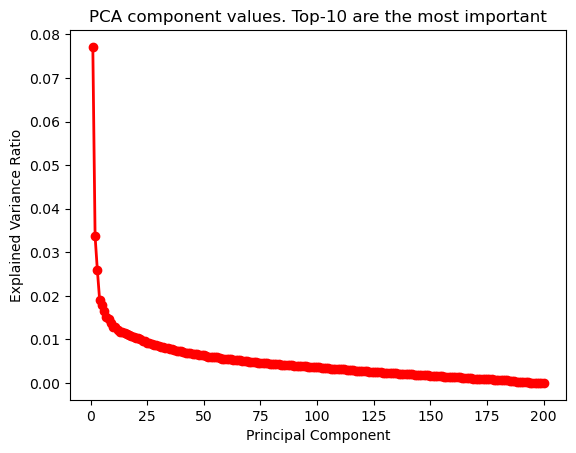

Step #6. train:  (945, 20)
Step #6. test:  (1459, 20)
Step #7. train:  (945, 20)
Step #7. test:  (1459, 20)


In [137]:
def perform_preprocessing():
    """ Performs full pre-processing pipeline """
    
    def count_missing_percentage(df):
        """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
        # Get Missing Velues per feature (exclude features that are complete)
        feature_missing = train.isnull().sum().sort_values(ascending = False)
        feature_missing = feature_missing[feature_missing > 0]
        percent = round(feature_missing/len(df)*100, 2)
        return pd.concat([feature_missing, percent], axis=1, keys=['Total','Percent'])
    
    def count_outliers(df):
        """ Returns table feature-wise outlier count """
        out = pd.Series(index=df.columns)
        total_num = df.shape[0]
        for column in df:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lowest_val = Q1 - 1.5*IQR
            highest_val = Q3 + 1.5*IQR
            
            flter_df = df[column].copy()
            flter_df = flter_df[flter_df > lowest_val]
            flter_df = flter_df[flter_df < highest_val]

            outlier_percentage = round(100 * (total_num - flter_df.shape[0]) / total_num, 2) 
            out[column] = outlier_percentage

        return out.sort_values(ascending = False)

    def drop_outliers_IQR(df):
        """ Drops samples that include outliers """
        
        def drop_outliers(ddf, field_name):
            """ Drops outliers for specific column """
            df = ddf.copy()
            iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
            df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
            df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
            return df
        
        for column in df:
            if df[column].dtypes != np.int64:
                continue
            df = drop_outliers(df, column)
        return df
    
    def apply_categorical_encoding(dff, categorical_columns):
        """ For given list of categorical features it replaces categorical columns with encoded ste of columns """
        from sklearn.preprocessing import OneHotEncoder
        encoder = OneHotEncoder()

        df = dff.copy().reset_index()
        encoded_dataframe = pd.DataFrame()
        for column in categorical_columns:
            encoded_data = encoder.fit_transform(df[[column]]).toarray()
            encoded_df = pd.DataFrame(encoded_data, columns=['{}_'.format(column) + x for x in encoder.categories_[0]])
            encoded_dataframe = pd.concat([encoded_dataframe, encoded_df], axis=1)
            
        df.drop(categorical_columns, axis=1, inplace=True)
        df = pd.concat([df, encoded_dataframe], axis=1)
        return df
    
    # 1. Load data
    train = pd.read_csv("dataset/train.csv")
    test = pd.read_csv("dataset/test.csv")
    
    print("Step #1. train: ", train.shape)
    print("Step #1. test: ", test.shape)
    
    # 2. Remove "bad" features
    ## 2.0 Removes "Id"
    train.drop(["Id"], axis=1, inplace = True)
    test_id = test["Id"]
    test.drop(["Id"], axis=1, inplace = True)
    
    print("Step #2.0. train: ", train.shape)
    print("Step #2.0. test: ", test.shape)
    
    ## 2.1 Removes features with too many Missed Values
    drop_threshold = 20 # Drop features that have more than 20% of missing data
    
    low_data_features = count_missing_percentage(train)
    low_data_features = low_data_features[low_data_features["Percent"] >  drop_threshold]
    drop_cols = low_data_features.T.columns
    print("Features to be dropped: {}".format(list(drop_cols)))
    
    train.drop(drop_cols, axis=1, inplace = True)
    test.drop(drop_cols, axis=1, inplace = True)
    
    print("Step #2.1. train: ", train.shape)
    print("Step #2.1. test: ", test.shape)
    
    ## 2.2 Removes features with too many outliers
    drop_outliers_threshold = 50 # Drop all features that have more than 50% of outliers

    numerical_train = train.loc[:, train.dtypes == np.int64]
    outliers = count_outliers(numerical_train)
    zero_outliers = outliers.index[outliers > drop_outliers_threshold]
    print("Outlier features: {}".format(list(zero_outliers)))

    train.drop(zero_outliers, axis=1, inplace=True)
    test.drop(zero_outliers, axis=1, inplace=True)
    
    print("Step #2.2. train: ", train.shape)
    print("Step #2.2. test: ", test.shape)
    
    # 3. Fill Missing Values
    mode_values = train.mode().iloc[0]
    train.fillna(mode_values, inplace = True)
    test.fillna(mode_values, inplace = True)
    
    print("Step #3. train: ", train.shape)
    print("Step #3. test: ", test.shape)
    
    # 4. Remove Outliers (samples with outliers)
    ## APLLY ONLY TO TRAIN AS IT ONLY HELPS DURING TRAINING!
    ## WE SHALL PROCESS ALL TESTING SAMPLES, SO WE CANT DROP THEM
    train = drop_outliers_IQR(train)
    
    print("Step #4. train: ", train.shape)
    print("Step #4. test: ", test.shape)
    
    # 5. Separate traget and train
    target = train["SalePrice"]
    train.drop(["SalePrice"], axis=1, inplace=True)
    
    print("Step #5. train: ", train.shape)
    print("Step #5. test: ", test.shape)
    
    # 6. Encode categorical features
    categorical_columns = train.columns[train.dtypes == "object"]
    train = apply_categorical_encoding(train, categorical_columns)
    test = apply_categorical_encoding(test, categorical_columns)
    
    print("Step #6.1. train: ", train.shape)
    print("Step #6.1. test: ", test.shape)
    
    # PS: Test dataset has more categorical values than Training causing varience in col number. 
    # Fix was found here: https://www.kaggle.com/code/ekam123/using-categorical-data-with-one-hot-encoding/notebook 
    # and here https://www.kaggle.com/discussions/getting-started/50008#284798 
    train, test = train.align(test, join='left', axis=1)

    print("Step #6.2. train: ", train.shape)
    print("Step #6.2. test: ", test.shape)
    
    # PS: Align causes Missing Values in test dataset
    # TEMPORAL solution is to fill it with modes from train dataset (Don't know what to do with them actually)
    print("Train missing values: ", train.isna().sum().sum())
    print("Test missing values: ", test.isna().sum().sum())
    
    mode_values = train.mode().iloc[0]
    train.fillna(mode_values, inplace = True)
    test.fillna(mode_values, inplace = True)
    
    print("Train missing values: ", train.isna().sum().sum())
    print("Test missing values: ", test.isna().sum().sum())
    
    # 7. Reduce dimentionality with PCA
    ## PS: Data must be scaled before PCA!
    scaler = StandardScaler()
    scaler.fit(train)

    train = pd.DataFrame(scaler.transform(train))
    test = pd.DataFrame(scaler.transform(test))
    
    pca = PCA(n_components=200)
    pca.fit_transform(train)

    # plot scree plot
    plt.plot(range(1, 201), pca.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.title('PCA component values. Top-10 are the most important')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()
    
    ## I chose PCA_N = 20
    pca = PCA(n_components=20)
    pca.fit(train)
    
    train = pd.DataFrame(pca.transform(train))
    test = pd.DataFrame(pca.transform(test))
    
    print("Step #6. train: ", train.shape)
    print("Step #6. test: ", test.shape)
    
    # 8. Scale
    scaler = StandardScaler()
    scaler.fit(train)

    train = pd.DataFrame(scaler.transform(train))
    test = pd.DataFrame(scaler.transform(test))
    
    print("Step #7. train: ", train.shape)
    print("Step #7. test: ", test.shape)
    
    return train, test, target, test_id

train, test, target, test_id = perform_preprocessing()

In [138]:
print(train.shape, test.shape, target.shape, test_id.shape)

(945, 20) (1459, 20) (945,) (1459,)


In [139]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.143704,0.461754,-0.598542,0.333193,-0.956087,-0.513376,-0.038105,-0.307703,1.132927,0.354732,0.616966,-0.932088,-0.639686,-0.312860,0.203164,0.381234,-0.030896,0.934175,-0.611031,0.460774
1,-1.270438,0.325705,-0.573951,0.625013,-0.824455,-0.346702,0.370872,-0.437242,0.334234,0.138666,0.735322,-0.802776,-0.179027,-0.404160,0.331334,0.434480,0.110818,0.333386,-0.369769,0.330794
2,0.410660,0.686065,-0.708268,0.201746,-0.061785,-0.049927,0.040738,-0.003424,-2.675490,0.166140,0.466216,1.255969,0.439916,0.411529,1.159369,-0.437731,-0.232020,-0.690349,-0.909968,-0.253945
3,-1.690221,0.230826,-1.628505,1.128026,0.167049,-0.451094,0.069020,-0.650251,0.458975,0.271602,1.044916,-1.085821,0.609743,-0.176391,0.097467,0.319190,-0.337191,-0.147230,-0.499735,-0.023443
4,-0.135924,-0.096933,-0.226410,0.515256,-1.744914,0.653395,0.885178,-0.303567,-0.545339,-0.316141,0.297121,-0.445252,-0.668393,0.706374,-0.341587,1.461365,-0.145530,0.224253,-0.262637,-0.822796


In [140]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.874173,-0.839611,0.293155,-0.651998,-0.336408,0.746876,-0.210626,0.380496,0.910873,0.186933,0.353485,-0.948065,-0.360244,0.121499,-0.861762,0.733430,0.423112,0.831854,-0.278691,-0.250348
1,0.454222,-1.273033,-0.552488,-0.139389,0.893181,0.060390,0.547248,-0.827299,0.856605,-0.378224,0.703765,0.534837,-0.063623,-0.022425,0.357811,-0.296985,0.207881,-0.740624,0.433644,-0.273361
2,-0.608023,0.285418,-1.184679,0.451417,-1.388697,0.241258,0.499948,0.050022,0.043089,-0.225483,-0.261596,0.280259,-0.250139,0.332898,-0.294205,0.447706,0.146774,0.202820,0.137463,-0.706513
3,-0.804440,0.289466,-1.119131,0.328143,-0.978773,-0.079686,0.067821,-0.329389,0.479707,-0.102731,-0.061119,0.021307,0.019711,0.034018,0.252997,0.231632,0.759108,0.004631,0.101850,-0.411857
4,-0.806874,-0.210345,1.680616,1.063744,-1.024940,-0.652061,-0.350541,-0.703094,-0.367787,-0.944661,-2.585311,1.111223,1.147790,0.146753,-0.234805,-0.407727,-1.379451,-0.235747,1.447475,1.018181


In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(756, 20) (189, 20) (756,) (189,)
